In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
url = r"C:\Users\gonza\Downloads\hotel_booking_demand\hotel_bookings.csv"
df_hotel = pd.read_csv(url)
df_hotel.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02


In [3]:
# vemos un poco el dataframe en general
df_hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
hotel                             119390 non-null object
is_canceled                       119390 non-null int64
lead_time                         119390 non-null int64
arrival_date_year                 119390 non-null int64
arrival_date_month                119390 non-null object
arrival_date_week_number          119390 non-null int64
arrival_date_day_of_month         119390 non-null int64
stays_in_weekend_nights           119390 non-null int64
stays_in_week_nights              119390 non-null int64
adults                            119390 non-null int64
children                          119386 non-null float64
babies                            119390 non-null int64
meal                              119390 non-null object
country                           118902 non-null object
market_segment                    119390 non-null object
distribution_channel              119390 n

In [13]:
#Where do the guests come from? (cancelled are included)
df_hotel["hotel"].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [25]:
countrys_city = df_hotel[df_hotel["hotel"] == "City Hotel"]["country"].value_counts(ascending=False, normalize=True).head(10) * 100

country_resorts = df_hotel[df_hotel["hotel"] == "Resort Hotel"]["country"].value_counts(ascending=False, normalize=True).head(10) * 100


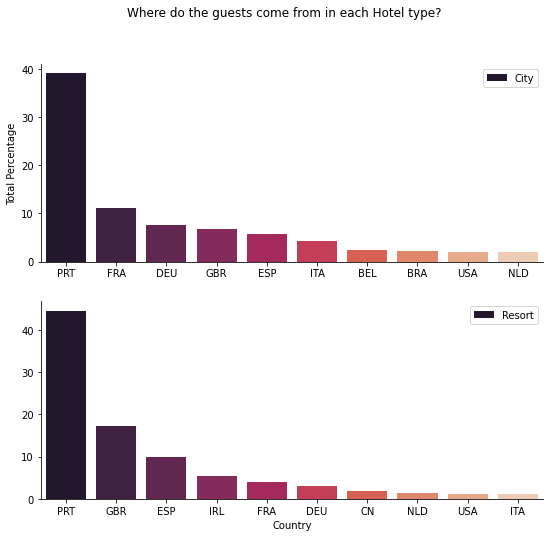

In [73]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(9,8))
sns.barplot(y="country", x="index", palette="rocket",ax=ax1, label="City", data=countrys_city.reset_index())
ax1.set_ylabel("Total Percentage")
ax1.set_yticks(np.arange(0,50,10))
ax1.set_xlabel("")
ax1.legend()


sns.barplot(y="country", x="index", palette="rocket",ax=ax2, label="Resort", data=country_resorts.reset_index())
ax2.set_xlabel("Country")
ax2.set_ylabel("")
ax2.legend()
fig.suptitle("Where do the guests come from in each Hotel type?",fontdict={'fontsize': 16, 'fontweight': 'medium'})
sns.despine()


In [ ]:
# country,s guest total 
